In [1]:
import numpy as np
import glob
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.filters import sobel

SIZE = 128

In [2]:
train_img = []
train_label = [] 
for dir_path in glob.glob("Dataset/train/*"):
    label = dir_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        train_img.append(img)
        train_label.append(label)
        
train_img = np.array(train_img)
train_label = np.array(train_label)

with_mask
Dataset/train/with_mask/with_mask (94).jpg
Dataset/train/with_mask/with_mask (332).jpg
Dataset/train/with_mask/with_mask (123).jpg
Dataset/train/with_mask/with_mask (20).jpg
Dataset/train/with_mask/with_mask (360).jpg
Dataset/train/with_mask/with_mask (339).jpg
Dataset/train/with_mask/with_mask (372).jpg
Dataset/train/with_mask/with_mask (232).jpg
Dataset/train/with_mask/with_mask (335).jpg
Dataset/train/with_mask/with_mask (308).jpg
Dataset/train/with_mask/with_mask (91).jpg
Dataset/train/with_mask/with_mask (273).jpg
Dataset/train/with_mask/with_mask (189).jpg
Dataset/train/with_mask/with_mask (113).jpg
Dataset/train/with_mask/with_mask (28).jpg
Dataset/train/with_mask/with_mask (336).jpg
Dataset/train/with_mask/with_mask (236).jpg
Dataset/train/with_mask/with_mask (221).jpg
Dataset/train/with_mask/with_mask (380).jpg
Dataset/train/with_mask/with_mask (385).jpg
Dataset/train/with_mask/with_mask (112).jpg
Dataset/train/with_mask/with_mask (153).jpg
Dataset/train/with_mask/wi

Dataset/train/with_mask/with_mask (131).jpg
Dataset/train/with_mask/with_mask (53).jpg
Dataset/train/with_mask/with_mask (259).jpg
Dataset/train/with_mask/with_mask (5).jpg
Dataset/train/with_mask/with_mask (351).jpg
Dataset/train/with_mask/with_mask (71).jpg
Dataset/train/with_mask/with_mask (292).jpg
Dataset/train/with_mask/with_mask (37).jpg
Dataset/train/with_mask/with_mask (242).jpg
Dataset/train/with_mask/with_mask (29).jpg
Dataset/train/with_mask/with_mask (70).jpg
Dataset/train/with_mask/with_mask (393).jpg
Dataset/train/with_mask/with_mask (245).jpg
Dataset/train/with_mask/with_mask (56).jpg
Dataset/train/with_mask/with_mask (369).jpg
Dataset/train/with_mask/with_mask (352).jpg
Dataset/train/with_mask/with_mask (328).jpg
Dataset/train/with_mask/with_mask (207).jpg
Dataset/train/with_mask/with_mask (357).jpg
Dataset/train/with_mask/with_mask (55).jpg
Dataset/train/with_mask/with_mask (185).jpg
Dataset/train/with_mask/with_mask (36).jpg
Dataset/train/with_mask/with_mask (107).jp

Dataset/train/without_mask/without_mask (104).jpg
Dataset/train/without_mask/without_mask (25).jpg
Dataset/train/without_mask/without_mask (83).jpg
Dataset/train/without_mask/without_mask (154).jpg
Dataset/train/without_mask/without_mask (173).jpg
Dataset/train/without_mask/without_mask (134).jpg
Dataset/train/without_mask/without_mask (117).jpg
Dataset/train/without_mask/without_mask (22).jpg
Dataset/train/without_mask/without_mask (170).jpg
Dataset/train/without_mask/without_mask (165).jpg
Dataset/train/without_mask/without_mask (181).jpg
Dataset/train/without_mask/without_mask (157).jpg
Dataset/train/without_mask/without_mask (63).jpg
Dataset/train/without_mask/without_mask (210).jpg
Dataset/train/without_mask/without_mask (87).jpg
Dataset/train/without_mask/without_mask (141).jpg
Dataset/train/without_mask/without_mask (138).jpg
Dataset/train/without_mask/without_mask (56).jpg
Dataset/train/without_mask/without_mask (126).jpg
Dataset/train/without_mask/without_mask (208).jpg
Datase

In [3]:
test_img = []
test_label = [] 
for dir_path in glob.glob("Dataset/test/*"):
    label2 = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_img.append(img)
        test_label.append(label2)
        
test_img = np.array(test_img)
test_label = np.array(test_label)

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_label)
test_encoded = le.transform(test_label)
le.fit(train_label)
train_encoded = le.transform(train_label)

x_train, y_train, x_test, y_test = train_img, train_encoded, test_img, test_encoded

x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
def feature_extractor(dataset):
    x_train = dataset
    img_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):
        
        df = pd.DataFrame()
        
        input_img = x_train[image, :,:,:]
        img = input_img
   
        # FEATURE 1 - Pixel values
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values

        # FEATURE 2 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1

        img_dataset = img_dataset.append(df)
        
    return img_dataset

In [6]:
image_features = feature_extractor(x_train)

n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_svm = np.reshape(image_features, (x_train.shape[0], -1)) 

from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(X_svm, y_train)

SVC(decision_function_shape='ovo')

In [7]:
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_svm = np.reshape(test_features, (x_test.shape[0], -1))

test_prediction = SVM_model.predict(test_for_svm)

test_prediction = le.inverse_transform(test_prediction)

In [8]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_label, test_prediction))

Accuracy =  0.9539473684210527


<AxesSubplot:>

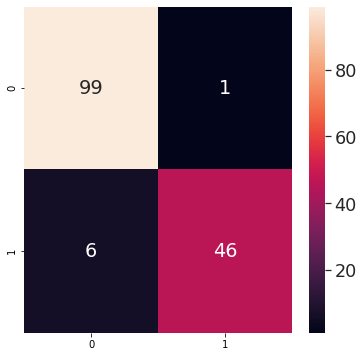

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)
